# Análisis de datos

En este notebook se documenta el proceso de las tareas asociadas al rol de análisis de datos

## Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de datos

In [2]:
df = pd.read_csv("..\Data\Clean_data.csv", low_memory=False)

In [3]:
columnas_numericas = df.select_dtypes(include=['number']).columns.tolist()
columnas_no_numericas = df.select_dtypes(exclude=['number']).columns.tolist()
print(f"Columnas no numéricas: {columnas_no_numericas}\nColumnas numéricas: {columnas_numericas}")

Columnas no numéricas: ['estu_tipodocumento', 'estu_consecutivo', 'cole_area_ubicacion', 'cole_bilingue', 'cole_calendario', 'cole_caracter', 'cole_depto_ubicacion', 'cole_genero', 'cole_jornada', 'cole_mcpio_ubicacion', 'cole_naturaleza', 'cole_nombre_establecimiento', 'cole_nombre_sede', 'cole_sede_principal', 'estu_depto_presentacion', 'estu_depto_reside', 'estu_estadoinvestigacion', 'estu_estudiante', 'estu_fechanacimiento', 'estu_genero', 'estu_mcpio_presentacion', 'estu_mcpio_reside', 'estu_nacionalidad', 'estu_pais_reside', 'estu_privado_libertad', 'fami_cuartoshogar', 'fami_educacionmadre', 'fami_educacionpadre', 'fami_estratovivienda', 'fami_personashogar', 'fami_tieneautomovil', 'fami_tienecomputador', 'fami_tieneinternet', 'fami_tienelavadora', 'desemp_ingles']
Columnas numéricas: ['periodo', 'cole_cod_dane_establecimiento', 'cole_cod_dane_sede', 'cole_cod_depto_ubicacion', 'cole_cod_mcpio_ubicacion', 'cole_codigo_icfes', 'estu_cod_depto_presentacion', 'estu_cod_mcpio_presen

## Tarea 3: Exploración de datos

In [4]:
# Estadísticas descriptivas para columnas numéricas
print("\nEstadísticas descriptivas para variables numéricas:")
print(df[columnas_numericas].describe())


Estadísticas descriptivas para variables numéricas:
       periodo  cole_cod_dane_establecimiento  cole_cod_dane_sede  \
count  32343.0                   3.234300e+04        3.234300e+04   
mean   20181.0                   3.491821e+11        3.492604e+11   
std        0.0                   5.036591e+10        5.070437e+10   
min    20181.0                   1.050010e+11        1.050010e+11   
25%    20181.0                   3.117690e+11        3.117690e+11   
50%    20181.0                   3.686790e+11        3.686790e+11   
75%    20181.0                   3.760010e+11        3.760010e+11   
max    20181.0                   5.190010e+11        6.252690e+11   

       cole_cod_depto_ubicacion  cole_cod_mcpio_ubicacion  cole_codigo_icfes  \
count              32343.000000              32343.000000        32343.00000   
mean                  44.856167              44962.663327       109598.42915   
std                   30.735086              30732.838382       151230.54915   
min  

In [5]:
# Estadísticas descriptivas para columnas categóricas
print("\nEstadísticas descriptivas para variables categóricas:")
print(df[columnas_no_numericas].describe(include='object'))


Estadísticas descriptivas para variables categóricas:
       estu_tipodocumento  estu_consecutivo cole_area_ubicacion cole_bilingue  \
count               32343             32343               32343         32343   
unique                  8             19794                   2             3   
top                    TI  SB11201810021815              URBANO            No   
freq                24944                 3               28236         20317   

       cole_calendario cole_caracter cole_depto_ubicacion cole_genero  \
count            32343         32343                32343       32343   
unique               3             5                   29           3   
top                  B     ACADEMICO                VALLE       MIXTO   
freq             25826         25003                14166       29079   

       cole_jornada cole_mcpio_ubicacion  ... fami_cuartoshogar  \
count         32343                32343  ...             32343   
unique            6                  13

### Estadísticas descriptivas 

#### Puntajes

In [6]:
puntajes = ['punt_global', 'punt_lectura_critica', 'punt_matematicas', 
            'punt_c_naturales', 'punt_sociales_ciudadanas', 'punt_ingles']
print(df[puntajes].describe().round(2))

       punt_global  punt_lectura_critica  punt_matematicas  punt_c_naturales  \
count     32343.00              32343.00          32343.00          32343.00   
mean        299.13                 61.16             59.56             58.97   
std          61.85                 10.81             14.12             12.59   
min          31.00                  0.00              0.00             25.00   
25%         256.00                 54.00             50.00             50.00   
50%         308.00                 62.00             61.00             61.00   
75%         347.00                 69.00             70.00             68.00   
max         475.00                100.00            100.00            100.00   

       punt_sociales_ciudadanas  punt_ingles  
count                  32343.00     32208.00  
mean                      58.52        64.98  
std                       12.98        17.18  
min                       20.00         0.00  
25%                       49.00        52.00

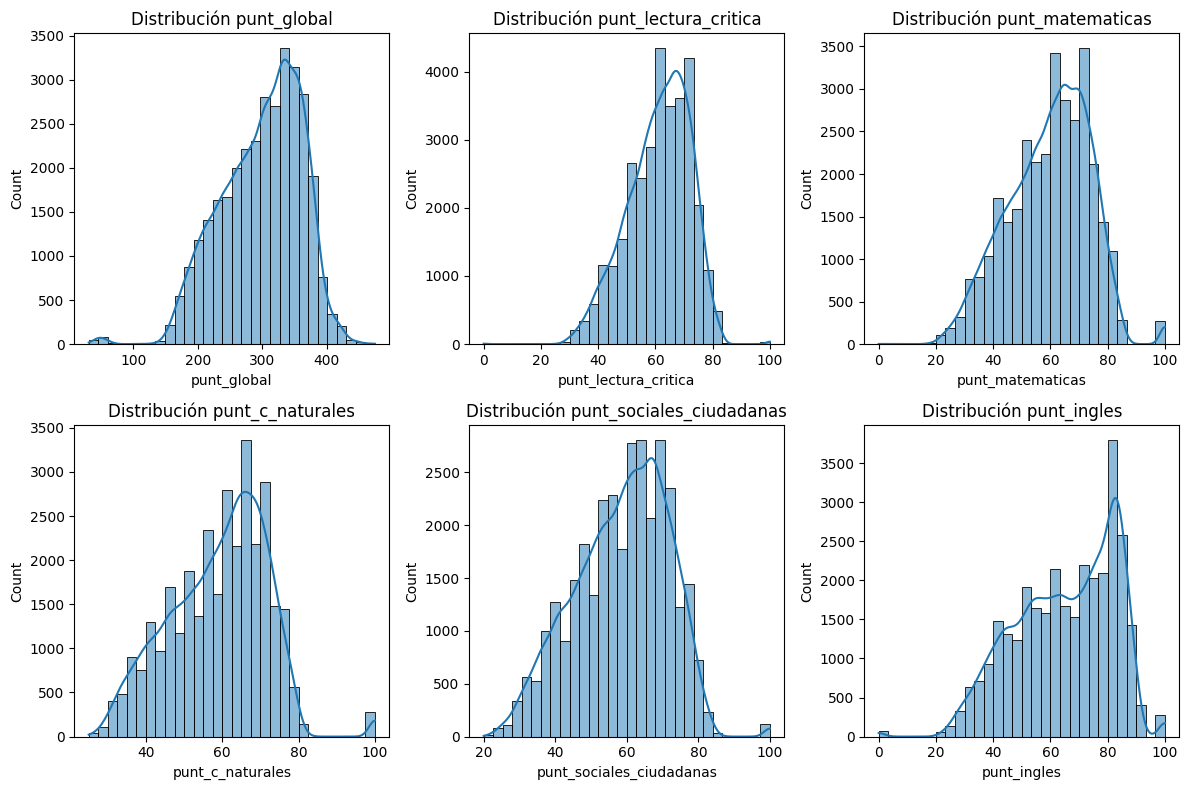

In [7]:
plt.figure(figsize=(12,8))
for i, col in enumerate(puntajes, 1):
    plt.subplot(2,3,i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribución {col}')
plt.tight_layout()
plt.show()

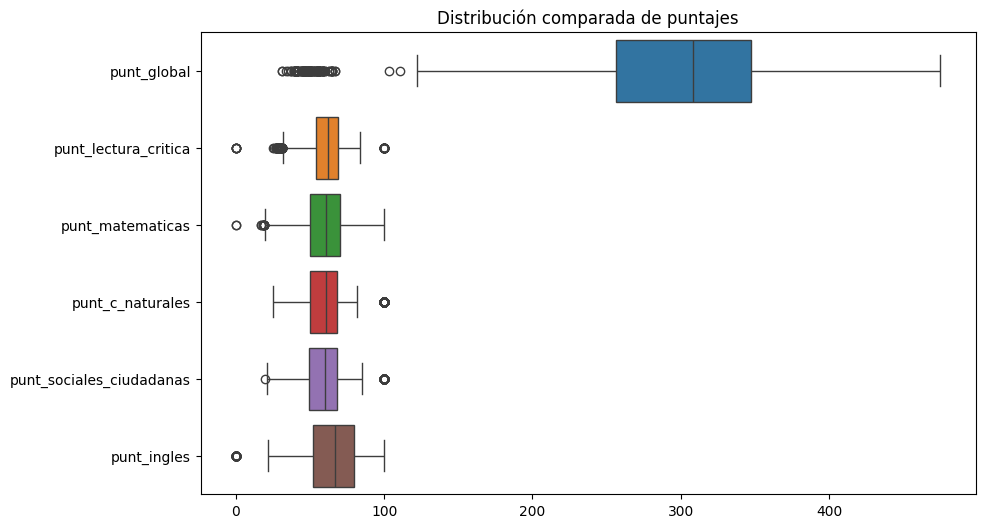

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[puntajes], orient='h')
plt.title('Distribución comparada de puntajes')
plt.show()

##### Relación entre variables

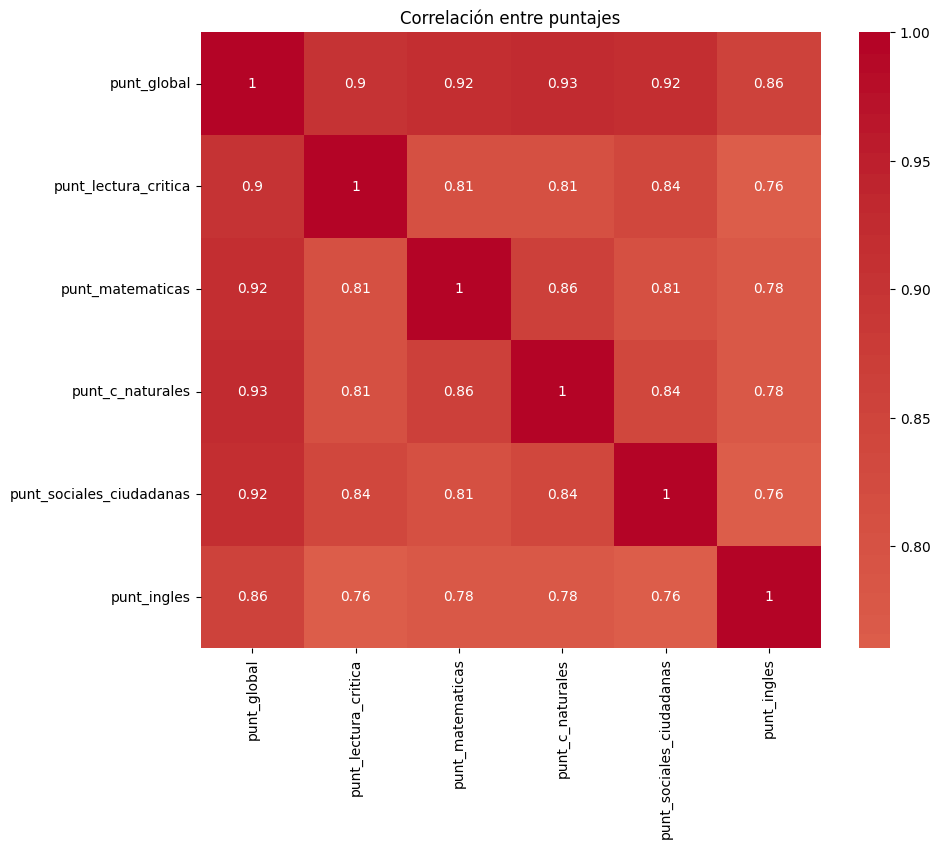

In [9]:
corr_matrix = df[puntajes].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlación entre puntajes')
plt.show()

### Colegio

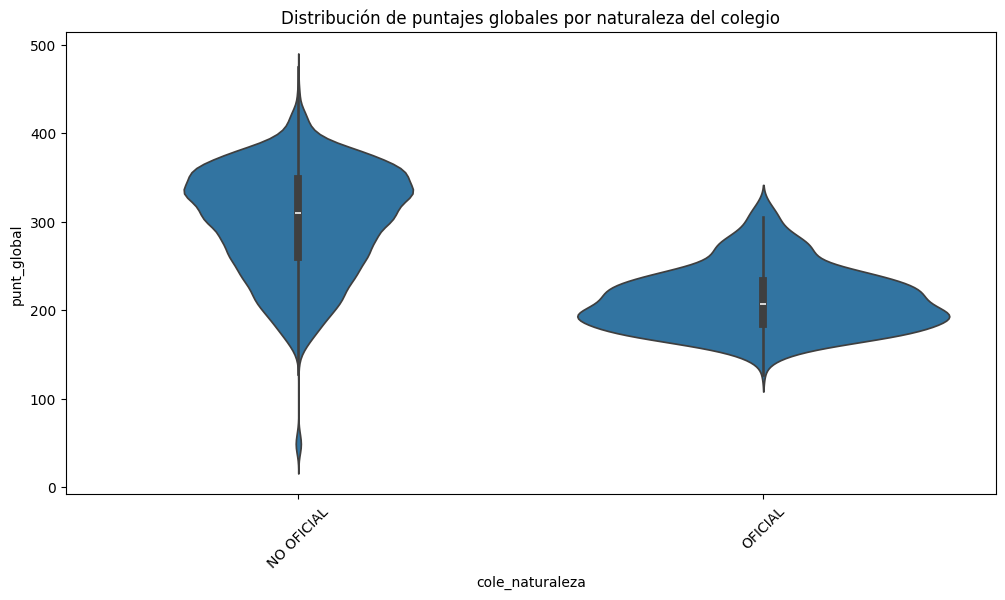

In [10]:
plt.figure(figsize=(12,6))
sns.violinplot(x='cole_naturaleza', y='punt_global', data=df)
plt.title('Distribución de puntajes globales por naturaleza del colegio')
plt.xticks(rotation=45)
plt.show()

In [11]:
pd.pivot_table(df, index='cole_area_ubicacion', 
               values=puntajes, aggfunc='mean').round(2)

,punt_c_naturales,punt_global,punt_ingles,punt_lectura_critica,punt_matematicas,punt_sociales_ciudadanas
cole_area_ubicacion,,,,,,
RURAL,63.86,325.81,74.76,65.14,64.83,63.60
URBANO,58.26,295.25,63.55,60.58,58.80,57.79


## Ingeniería de Features

In [12]:
df['nivel_rendimiento'] = pd.cut(df['punt_global'],
                                bins=[0, 250, 300, 350, 500],
                                labels=['Bajo', 'Medio', 'Alto', 'Excelente'])
# df['acceso_tecnologia'] = df[['fami_tienecomputador', 'fami_tieneinternet']].mean(axis=1)
df['movilidad_educativa'] = np.where(
    df['estu_cod_depto_presentacion'] == df['estu_cod_reside_depto'],
    'Mismo Depto',
    'Diferente Depto'
)

In [13]:
df['efecto_pares'] = pd.qcut(df.groupby('cole_codigo_icfes')['punt_global']
                          .transform('mean'),
                          q=5,
                          labels=['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto'])

In [14]:
# Valores únicos y conteo para educación de la madre
print("Valores únicos para fami_educacionmadre:")
print(df['fami_educacionmadre'].value_counts(dropna=False))

# Valores únicos para educación del padre
print("\nValores únicos para fami_educacionpadre:")
print(df['fami_educacionpadre'].value_counts(dropna=False))

Valores únicos para fami_educacionmadre:
fami_educacionmadre
EDUCACION PROFESIONAL COMPLETA          10839
POSTGRADO                                5163
SECUNDARIA (BACHILLERATO) COMPLETA       4433
TECNICA O TECNOLOGICA COMPLETA           2872
Desconocido                              1756
SECUNDARIA (BACHILLERATO) INCOMPLETA     1744
EDUCACION PROFESIONAL INCOMPLETA         1405
PRIMARIA INCOMPLETA                      1287
PRIMARIA COMPLETA                         929
NO SABE                                   794
TECNICA O TECNOLOGICA INCOMPLETA          790
NINGUNO                                   273
NO APLICA                                  58
Name: count, dtype: int64

Valores únicos para fami_educacionpadre:
fami_educacionpadre
EDUCACION PROFESIONAL COMPLETA          9422
POSTGRADO                               5552
SECUNDARIA (BACHILLERATO) COMPLETA      4617
TECNICA O TECNOLOGICA COMPLETA          2169
SECUNDARIA (BACHILLERATO) INCOMPLETA    2156
Desconocido                 

In [20]:
# Diccionario de mapeo definitivo
education_map = {
    'NINGUNO': 0,
    'NO SABE': 0,
    'NO APLICA': 0,
    'PRIMARIA INCOMPLETA': 1,
    'PRIMARIA COMPLETA': 2,
    'SECUNDARIA (BACHILLERATO) INCOMPLETA': 3,
    'SECUNDARIA (BACHILLERATO) COMPLETA': 4,
    'TECNICA O TECNOLOGICA INCOMPLETA': 4.5,
    'TECNICA O TECNOLOGICA COMPLETA': 5,
    'EDUCACION PROFESIONAL INCOMPLETA': 5.5,
    'EDUCACION PROFESIONAL COMPLETA': 6,
    'POSTGRADO': 7,
    'DESCONOCIDO': -1  # Valor especial para desconocido
}

# Función de mapeo robusta
def map_education(value):
    value_cleaned = str(value).strip().upper()
    return education_map.get(value_cleaned, -1)  # Default a -1 si no encuentra coincidencia

# Creación de la variable
df['nivel_educativo_hogar'] = (
    df[['fami_educacionmadre', 'fami_educacionpadre']]
    .map(map_education)
    .mean(axis=1)
    .round()
    .replace(-1, 'Desconocido')  # Convertimos los -1 resultantes
)

# df['nivel_educativo_hogar_num'] = (
#     df['nivel_educativo_hogar']
#     .replace('Desconocido', np.nan)
#     .astype(float)
# )

In [16]:
df.head()

,periodo,estu_tipodocumento,estu_consecutivo,cole_area_ubicacion,cole_bilingue,cole_calendario,cole_caracter,cole_cod_dane_establecimiento,cole_cod_dane_sede,cole_cod_depto_ubicacion,...,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global,semestre_prueba,nivel_rendimiento,movilidad_educativa,efecto_pares,nivel_educativo_hogar
0,20181,CC,SB11201810003214,URBANO,No,B,ACADEMICO,376001002376,376001002376,76,...,68.0,76,69,67,353,1,Excelente,Mismo Depto,Muy alto,7.0
1,20181,CC,SB11201810003214,URBANO,No,B,ACADEMICO,376001002376,376001002376,76,...,68.0,76,69,67,353,1,Excelente,Mismo Depto,Muy alto,7.0
2,20181,TI,SB11201810043861,RURAL,Desconocido,B,ACADEMICO,476520003791,476520003791,76,...,49.0,41,49,44,227,1,Bajo,Mismo Depto,Bajo,6.0
3,20181,TI,SB11201810043861,RURAL,Desconocido,B,ACADEMICO,476520003791,476520003791,76,...,49.0,41,49,44,227,1,Bajo,Mismo Depto,Bajo,6.0
4,20181,CC,SB11201810004937,RURAL,No,OTRO,ACADEMICO,425175032542,425175032542,25,...,57.0,48,57,55,273,1,Medio,Mismo Depto,Medio,6.0


In [21]:
print("Valores únicos en 'nivel_educativo_hogar':")
print(df['nivel_educativo_hogar'].astype(str).unique())

Valores únicos en 'nivel_educativo_hogar':
['7.0' '6.0' '4.0' '5.0' 'Desconocido' '0.0' '2.0' '3.0' '1.0' '-0.0']


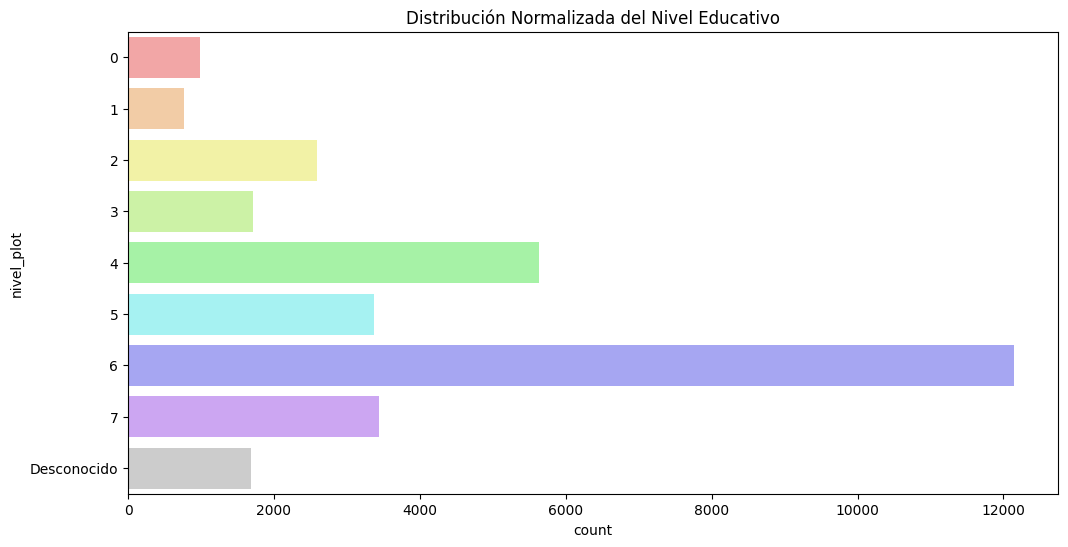

In [23]:
# Limpieza adicional
df['nivel_plot'] = df['nivel_educativo_hogar'].astype(str)
df['nivel_plot'] = df['nivel_plot'].str.replace('.0', '').replace('-0', '0')

# Actualizar paleta y orden
palette = {
    '0': '#ff9999', 
    '1': '#ffcc99',
    '2': '#ffff99',
    '3': '#ccff99',
    '4': '#99ff99',
    '5': '#99ffff',
    '6': '#9999ff',
    '7': '#cc99ff',
    'Desconocido': '#cccccc'
}
orden = ['0', '1', '2', '3', '4', '5', '6', '7', 'Desconocido']

# Gráfico
plt.figure(figsize=(12, 6))
sns.countplot(
    y='nivel_plot',
    data=df,
    order=orden,
    palette=palette,
    hue='nivel_plot',
    legend=False,
    dodge=False
)
plt.title('Distribución Normalizada del Nivel Educativo')
plt.show()